In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

In [ ]:
! wget https://www.dropbox.com/s/mw6ctze0ikcuqt4/mnist_train.csv?dl=0 -O mnist_train.csv

In [ ]:
! wget https://www.dropbox.com/s/e8n5v1sea2housp/mnist_test.csv?dl=0 -O mnist_test.csv

In [ ]:
train_data = np.loadtxt("mnist_train.csv", 
                        delimiter=",")
test_data = np.loadtxt("mnist_test.csv", 
                       delimiter=",")

In [ ]:
test_labels = test_data[:, 0].astype(int)
test_images = test_data[:, 1:].reshape(-1, 28*28) / 255.
train_labels = train_data[:, 0].astype(int)
train_images = train_data[:, 1:].reshape(-1, 28*28) / 255.

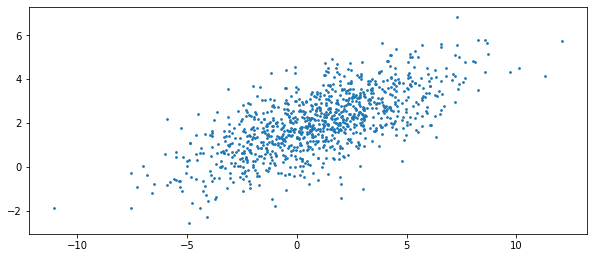

In [ ]:
## creazione di una distribuzione gaussiana bidimensionale
m = (1, 2)
sigma = [[10, 3], [3, 2]]
samples = np.random.multivariate_normal(mean=m, cov=sigma, size = 1_000)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_aspect('equal')
plt.scatter(x=samples[:, 0], y=samples[:,1], s=3)

In [ ]:
## trasformazione secondo gli assi principali
sigma_ = np.cov(samples.T)
m_ = np.mean(samples, axis=0)

In [ ]:
sigma_

array([[9.13195971, 2.95721965],
       [2.95721965, 2.05010684]])

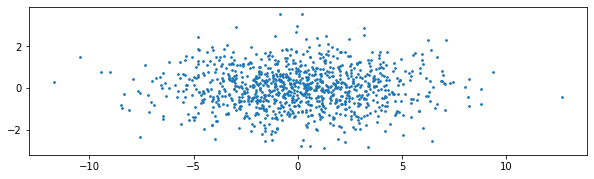

In [ ]:
w, v = np.linalg.eigh(sigma_)
w = np.flip(w)
v = np.fliplr(v)
pca_samples = (v.T@(samples.T - m_.reshape(2, 1))).T
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_aspect('equal')
plt.scatter(x=pca_samples[:, 0], y=pca_samples[:,1], s=3)

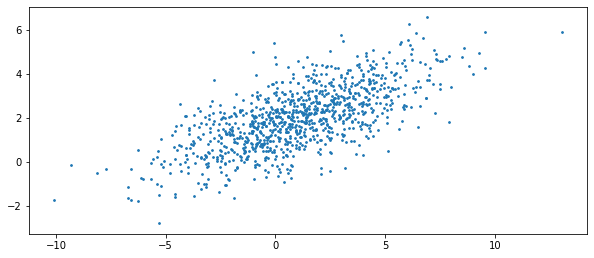

In [ ]:
w, v = np.linalg.eig(sigma_)
original_samples = (v@pca_samples.T + m_.reshape(2, 1)).T
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_aspect('equal')
plt.scatter(x=original_samples[:, 0], y=original_samples[:,1], s=3)

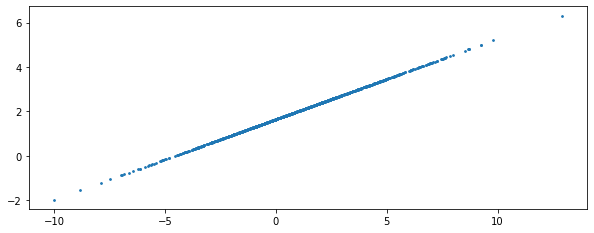

In [ ]:
w, v = np.linalg.eig(sigma_)
original_samples = (v[:, 0:1]@pca_samples.T[0:1, :] + m_.reshape(2, 1)).T
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_aspect('equal')
plt.scatter(x=original_samples[:, 0], y=original_samples[:,1], s=3)

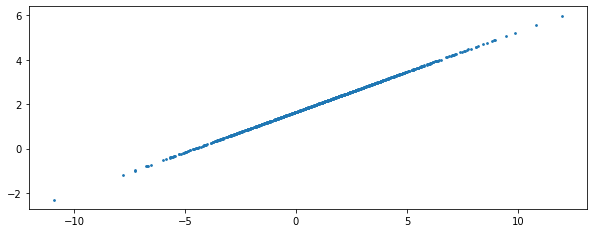

In [ ]:
pca = PCA(n_components=1, )
pca.fit(samples)
pca_samples = pca.transform(samples)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_aspect('equal')
plt.scatter(x=pca.inverse_transform(pca_samples)[:, 0], y=pca.inverse_transform(pca_samples)[:, 1], s=3)

In [ ]:
pca.components_

array([[-0.94008869, -0.34092998]])

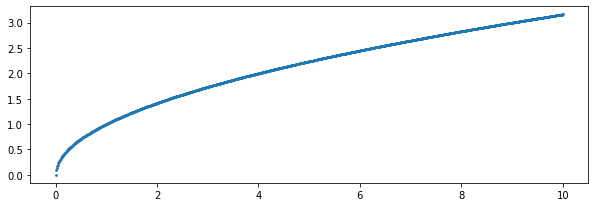

In [ ]:
## covarianza zero non significa indipendenza
x = np.linspace(0, 10, 1000)
y = x**(1/2)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_aspect('equal')
plt.scatter(x=x, y=y, s=3)

In [ ]:
samples = np.stack([x, y])
sigma_ = np.cov(samples)
m_ = np.mean(samples, axis=1)

In [ ]:
sigma_

array([[8.35837506, 2.11620609],
       [2.11620609, 0.55842304]])

In [ ]:
samples.shape

(2, 1000)

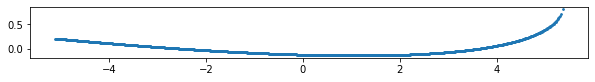

In [ ]:
w, v = np.linalg.eigh(sigma_)
w = np.flip(w)
v = np.fliplr(v)
pca_samples = (v.T@(samples - m_.reshape(2, 1))).T
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_aspect('equal')
plt.scatter(x=pca_samples[:, 0], y=pca_samples[:,1], s=3)

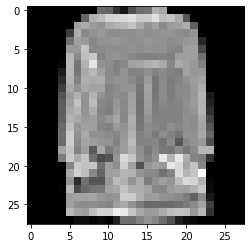

In [ ]:
# fare una pca sulle immagini
# fare un classificatore (es. KNN)
# Verificare l'accuratezza sul test set
# stampare qualche coppia di immagini (originle, ricostruita dopo la PCA)